# Context
The NYC Department of Finance collects data on every parking ticket issued in NYC (~10M per year!). This data is made publicly available to aid in ticket resolution and to guide policymakers.

Content
Since the dataset is too large, I have analyzed only 2017 file. See the dataset descriptions for exact details. Columns include information about the vehicle ticketed, the ticket issued, location, and time.

Acknowledgements
Data was produced by NYC Department of Finance. FY2018 data is found here with updates every third week of the month.

Analysis to be done : 
Where are tickets most commonly issued?
When are tickets most likely to be issued? Any seasonality?
What are the most types of cars to be ticketed?

In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt

In [5]:
tickets_data = pd.read_csv('/Users/alishaatreja/Desktop/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
tickets_data.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,...,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,...,WH,NaN,2007,NaN,0,04,47-Double PKG-Midtown,NaN,NaN,NaN
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,...,WHITE,NaN,2007,NaN,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN


In [38]:
# Checking datatypes
tickets_data.dtypes

Summons Number                                int64
Plate ID                                     object
Registration State                           object
Plate Type                                   object
Issue Date                                   object
Violation Code                                int64
Vehicle Body Type                            object
Vehicle Make                                 object
Issuing Agency                               object
Street Code1                                  int64
Street Code2                                  int64
Street Code3                                  int64
Vehicle Expiration Date                       int64
Violation Location                          float64
Violation Precinct                            int64
Issuer Precinct                               int64
Issuer Code                                   int64
Issuer Command                               object
Issuer Squad                                 object
Violation Ti

In [ ]:
# No. of records and columns
print(tickets_data.shape)

In [7]:
# Analyzing Total no. of missing values
total = tickets_data.isnull().sum().sort_values(ascending=False)
percent = (tickets_data.isnull().sum()/tickets_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Double Parking Violation,10803028,1.000000
Hydrant Violation,10803028,1.000000
No Standing or Stopping Violation,10803028,1.000000
Time First Observed,9962281,0.922175
Unregistered Vehicle?,9675432,0.895622
Meter Number,9017555,0.834725
Violation Legal Code,8740321,0.809062
Intersecting Street,7435473,0.688277
From Hours In Effect,5450946,0.504576
To Hours In Effect,5450943,0.504575


In [38]:
# Getting columns with more than 50 percent of missing data 
drop_Total=missing_data.index[missing_data["Percent"] > 0.50].tolist()

In [39]:
drop_Total

['Double Parking Violation',
 'Hydrant Violation',
 'No Standing or Stopping Violation',
 'Time First Observed',
 'Unregistered Vehicle?',
 'Meter Number',
 'Violation Legal Code',
 'Intersecting Street',
 'From Hours In Effect',
 'To Hours In Effect']

In [17]:
column_drop = ['Double Parking Violation',
 'Hydrant Violation',
 'No Standing or Stopping Violation',
 'Time First Observed',
 'Unregistered Vehicle?',
 'Meter Number',
 'Violation Legal Code',
 'Intersecting Street',
 'From Hours In Effect',
 'To Hours In Effect']

In [18]:
# Dropping columns with more than 50 percent of missing data 
tickets_data.drop(column_drop, axis = 1, inplace = True)

In [19]:
# Ten columns have been dropped
print(tickets_data.shape)

(10803028, 33)


In [20]:
# Dropping null value rows by analyzing Plate ID
tickets_data.dropna(axis = 0, how = 'any', subset = ['Plate ID'], inplace = True)

In [41]:
tickets_data['Plate ID'].isnull().any()

False

In [13]:
# Grouping on the basis of State
state_tickets_data=tickets_data.groupby(by='Registration State',as_index=False).count()
state_tickets_data.head()

,Registration State,Summons Number,Plate ID,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Street Name,Date First Observed,Law Section,Sub Division,Days Parking In Effect,Vehicle Color,Vehicle Year,Feet From Curb,Violation Post Code,Violation Description
0,99,36625,36625,36625,36625,36625,31519,30051,36625,36625,...,36185,36625,36625,36469,35216,32691,36625,36625,5226,5164
1,AB,218,218,218,218,218,214,214,218,218,...,218,218,218,218,202,215,218,218,206,206
2,AK,754,754,754,754,754,746,744,754,754,...,754,754,754,754,669,746,754,754,608,663
3,AL,6891,6891,6891,6891,6891,6818,6853,6891,6891,...,6887,6891,6891,6891,5699,6874,6891,6891,4861,5818
4,AR,2621,2621,2621,2621,2621,2601,2597,2621,2621,...,2620,2621,2621,2620,2257,2605,2621,2621,2002,2219


In [44]:
# Considering only two columns
tickets_data_columns = state_tickets_data[['Registration State','Summons Number']]
tickets_data_columns.head()

,Registration State,Summons Number
0,99,36625
1,AB,218
2,AK,754
3,AL,6891
4,AR,2621


In [15]:
# Removing state with value 99
final_tickets = tickets_data_columns[tickets_data_columns['Registration State']!='99']

In [16]:
final_tickets.head()

,Registration State,Summons Number
1,AB,218
2,AK,754
3,AL,6891
4,AR,2621
5,AZ,26426


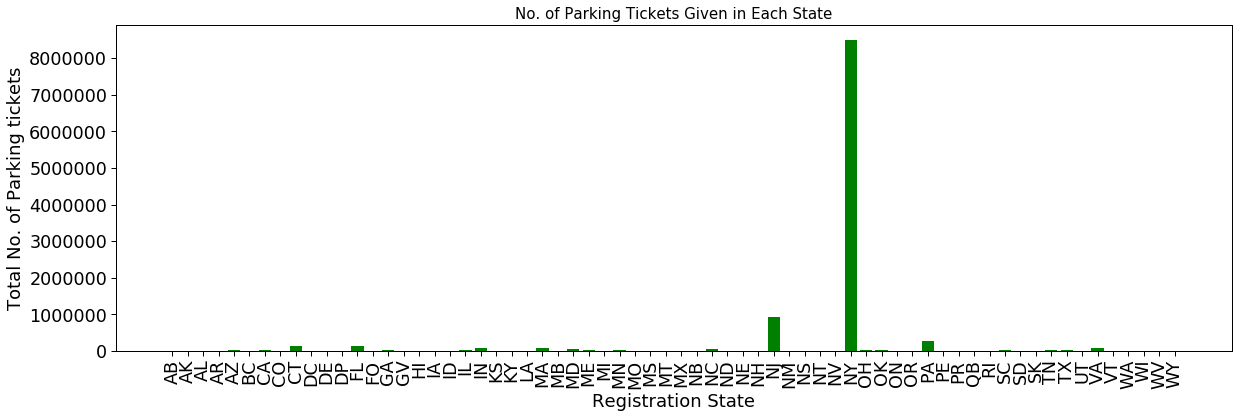

In [45]:
# Plotting State with Maximum No. of tickets
plt.figure(figsize=(20,6))
x=final_tickets['Summons Number']
y=final_tickets['Registration State']

plt.bar(y,x, color = 'g')
plt.xticks(rotation=90)

plt.title("No. of Parking Tickets Given in Each State", fontsize=15)
plt.xlabel("Registration State", fontsize=18)
plt.ylabel("Total No. of Parking tickets", fontsize=18)
plt.show()

Conclusion : Analysis shows Maximum Parking Tickets were given in New York state, way ahead of any other state

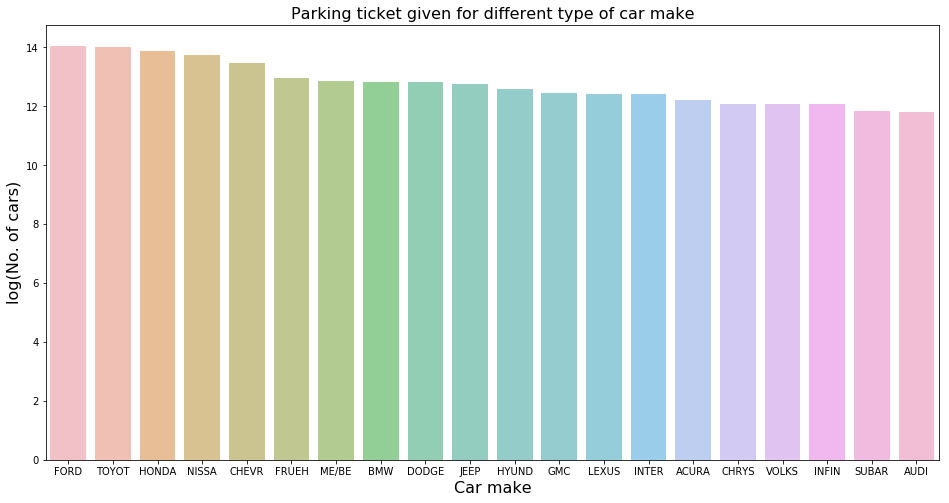

In [14]:
# Plot for analyzing car make with maximum tickets
vehicle_make = tickets_data['Vehicle Make'].value_counts()
vehicle_make2 = vehicle_make.head(20)

plt.figure(figsize=(16,8))
f = sns.barplot(y=np.log(vehicle_make2.values), x=vehicle_make2.index, alpha=0.6)

plt.ylabel('log(No. of cars)', fontsize=16);
plt.xlabel('Car make', fontsize=16);
plt.title('Parking ticket given for different type of car make', fontsize=16);

plt.show();

Conclusion : The Analysis shows Maximum Parking Tickets were given for FORD followed by TOYOTA and HONDA

In [22]:
tickets_data['date'] = pd.to_datetime(tickets_data['Issue Date']) # Convert date to datetime


In [23]:
tickets_data['month'] = tickets_data['date'].dt.month # Get month from Issue Date

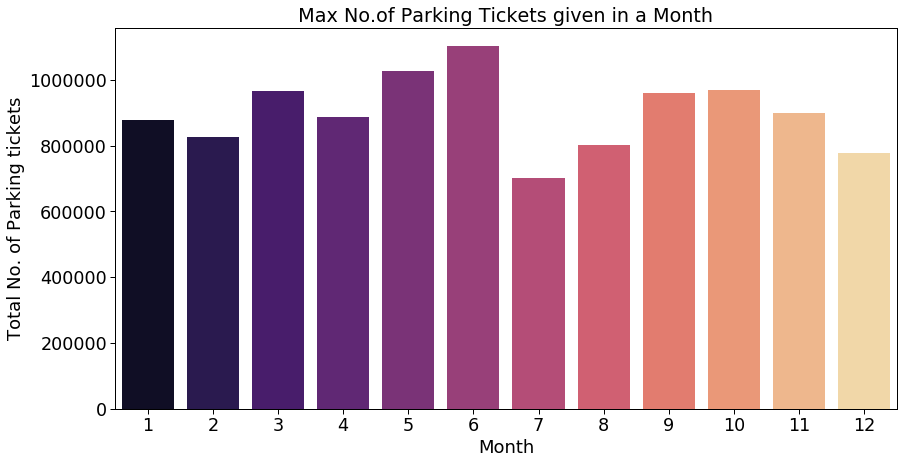

In [24]:
# Plot for analyzing maximum tickets given in a month
plt.figure(figsize=(14,7))

sns.set_context("paper", font_scale = 2)
sns.countplot(x= "month", data= tickets_data, palette="magma")


plt.title(" Max No.of Parking Tickets given in a Month ")
plt.xlabel("Month", fontsize=18)
plt.ylabel("Total No. of Parking tickets", fontsize=18)
plt.show()

Conclusion : The Analysis shows Maximum Parking Tickets were given in June
                    